In [1]:
# Install Tensorflow
# TensorFlow is an end-to-end open-source platform for machine learning. 
# It is a comprehensive and flexible ecosystem of tools, libraries and other resources that provide workflows with 
# high-level APIs.

!pip install tensorflow

  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached wrapt-1.12.1.tar.gz (27 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached cachetools-4.2.2-py3-none-any.whl (11 kB)
  Using cached rsa-4.7.2-py3-none-any.whl (34 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Using cached oauthlib-3.1.1-py2.py3-none-any.whl (146 

In [1]:
# Import Tenserflow packages
# Keras is a high-level neural networks library that is running on the top of TensorFlow,and Theano. 
# Using Keras in deep learning allows for easy and fast prototyping as well as running seamlessly on CPU and GPU.
# ImageDataGenerator generate batches of tensor image data with real-time data augmentation.
# Model groups layers into an object with training and inference features.
# Sequential groups a linear stack of layers into a tf.keras.Model.
# class Dense is regular densely-connected NN layer.
# GlobalAveragePooling2D is average pooling operation for spatial data globally.
# Flatten makes the input flat. Does not affect the batch size.
# InceptionV3, VGG16, and RESNET50 are inbuilt feature extractor in Keras
# RMSprop optimizer that implements the RMSprop algorithm.
# SGD optimiser Gradient descent (with momentum) optimizer.

import os 
import numpy as np
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator  
from tensorflow.keras import layers 
from tensorflow.keras import Model 

from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD





In [3]:
# DATA Extraction from the local directory 

#base_dir = 'BASE DIRECTORY'
base_directory = 'C:/Users/deepa/Documents/LYIT/DISSERTATION/Art and Artificial Intelligence/data-20210615T103041Z-001/data'
training_directory = os.path.join(base_directory, 'train')
validation_directory = os.path.join(base_directory, 'validation')

train_real_directory = os.path.join(training_directory, 'reals')
train_fake_directory = os.path.join(training_directory, 'fakes')
validation_real_directory = os.path.join(validation_directory, 'reals')
validation_fake_directory = os.path.join(validation_directory, 'fakes')


# DATA Wrangling 
# ImageDataGenerator from Keras is used to rescale, rotate, shift, shear, zoom and flip 
# while image processing as part of data augmentation. 
train_datageneration = ImageDataGenerator(rescale = 1./255., rotation_range = 40, 
                                   width_shift_range = 0.2, height_shift_range = 0.2, 
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datageneration = ImageDataGenerator(rescale = 1.0/255.)


# Defining train data generator and validation data generator
train_generator = train_datageneration.flow_from_directory(training_directory, batch_size = 20, 
                                                    class_mode = 'binary', target_size = (224, 224))
validation_generator = test_datageneration.flow_from_directory(validation_directory, batch_size = 20, 
                                                        class_mode = 'binary', target_size = (224, 224))

Found 9232 images belonging to 2 classes.
Found 3141 images belonging to 2 classes.


In [ ]:
# INCEPTION V3 is the inbuilt feature extractor. The entire layers are present inside this.
# The augmented input image having dimensions (224, 224, 3) is passed with option imagenet weights
base_model = InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')


# The front layers does not require trainning, only last layers need to train,
# hence the trainable = False option is selected.
for layer in base_model.layers:
    layer.trainable = False

# Specifying the dimensions of the dense layers
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation = 'sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

# Model Compilation
# RMSprop optimiser, binary_crossentropy loss function and accuracy metrics is used
model.compile(optimizer = RMSprop(lr = 0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

# Model Fit by passing train and validation data stored in the parameter 'inc_history' and model is saved as 'inception.h5'.
# total number of epochs and steps per epoch are defined as 100 each
inc_history = model.fit_generator(train_generator, validation_data = validation_generator, 
                                  steps_per_epoch = 100, epochs = 100)

model.save('inception.h5')

# Saving the INCEPTION V3 model outcomes in a .csv file named 'inception_history.csv' using pandas library.
import pandas as pd
inception_history = pd.DataFrame(inc_history.history)
inception_history.to_csv('inception_history.csv')

In [5]:
# VGG 16 is the inbuilt feature extractor. The entire layers are present inside this.
# The augmented input image having dimensions (224, 224, 3) is passed with option imagenet weights
base_model = VGG16(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')


# The front 13 layers does not require trainning, only last 2 layers need to train,
# hence the trainable = False option is selected.
for layer in base_model.layers:
    layer.trainable = False                    

    
# As per the VGG 16 architechture, there are 3 dense layers
# 1 x dense layer of 4096 units
# 1 x dense layer of 4096 units
# 1 x dense softmax layer of 2 units
# Specifying the dimensions of the dense layers

x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation = 'sigmoid')(x)
model = tf.keras.models.Model(base_model.input, x)


# Model Compilation
# RMSprop optimiser, binary_crossentropy loss function and accuracy metrics is used
model.compile(optimizer = RMSprop(lr = 0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

# Model Fit by passing train and validation data stored in the parameter 'vgghist' and model is saved as 'vgg16_model.h5'.
# total number of epochs and steps per epoch are defined as 100 each
vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 100)
model.save('vgg16_model.h5')

# Saving the VGG16 model outcomes in a .csv file named 'vgg16_history.csv' using pandas library.
import pandas as pd
history = pd.DataFrame(vgghist.history)
history.to_csv('vgg16_history.csv')



C:\Users\deepa\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\deepa\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 403s 4s/step - loss: 1.4358 - acc: 0.6220 - val_loss: 0.5459 - val_acc: 0.7342
Epoch 2/100
100/100 [==============================] - 371s 4s/step - loss: 0.6874 - acc: 0.6777 - val_loss: 0.4967 - val_acc: 0.7749
Epoch 3/100
100/100 [==============================] - 388s 4s/step - loss: 0.6060 - acc: 0.7095 - val_loss: 0.4741 - val_acc: 0.7695
Epoch 4/100
100/100 [==============================] - 370s 4s/step - loss: 0.5232 - acc: 0.7625 - val_loss: 0.3938 - val_acc: 0.8354
Epoch 5/100
100/100 [==============================] - 347s 3s/step - loss: 0.5196 - acc: 0.7605 - val_loss: 0.4221 - val_acc: 0.8074
Epoch 6/100
100/100 [==============================] - 351s 4s/step - loss: 0.4722 - acc: 0.7845 - val_loss: 0.5338 - val_acc: 0.7202
Epoch 7/100
100/100 [==============================] - 356s 4s/step - loss: 0.4765 - acc: 0.7905 - val_loss: 0.4282 - val_acc: 0.8166
Epoch 8/100
100/100 [==============================] - 355s 4s

C:\Users\deepa\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
100/100 [==============================] - 1384s 14s/step - loss: 0.7947 - acc: 0.5805 - val_loss: 0.6093 - val_acc: 0.6154
Epoch 2/100
100/100 [==============================] - 1377s 14s/step - loss: 0.6596 - acc: 0.6365 - val_loss: 0.4718 - val_acc: 0.7934
Epoch 3/100
100/100 [==============================] - 1413s 14s/step - loss: 0.5932 - acc: 0.6815 - val_loss: 0.4579 - val_acc: 0.7650
Epoch 4/100
100/100 [==============================] - 1391s 14s/step - loss: 0.5522 - acc: 0.7055 - val_loss: 0.4246 - val_acc: 0.8087
Epoch 5/100
100/100 [==============================] - 1392s 14s/step - loss: 0.5479 - acc: 0.7240 - val_loss: 0.4247 - val_acc: 0.8096
Epoch 6/100
100/100 [==============================] - 1391s 14s/step - loss: 0.5182 - acc: 0.7365 - val_loss: 0.3654 - val_acc: 0.8469
Epoch 7/100
100/100 [==============================] - 1398s 14s/step - loss: 0.5003 - acc: 0.7545 - val_loss: 0.3377 - val_acc: 0.8615
Epoch 8/100
100/100 [===========================

OSError: SavedModel file does not exist at: resnet_model.h5\{saved_model.pbtxt|saved_model.pb}

In [ ]:
# ResNet 50 is the inbuilt feature extractor. The entire layers are present inside this.
# The augmented input image having dimensions (224, 224, 3) is passed with option imagenet weights
base_model = ResNet50(input_shape = (224, 224,3), include_top = False, weights = 'imagenet')
base_model = Sequential()


# The front layers does not require trainning, only last layers need to train,
# hence the include_top = False option is selected. Max pooling and sigmoid activation is defined.
base_model.add(ResNet50(include_top = False, weights = 'imagenet', pooling = 'max'))
base_model.add(Dense(1, activation = 'sigmoid'))


# Model Compilation
# SGD optimiser, binary_crossentropy loss function and accuracy metrics is used
base_model.compile(optimizer = SGD(lr = 0.0001), loss = 'binary_crossentropy', metrics = ['acc'])


# Model Fit by passing train and validation data stored in the parameter 'resnet_history' and model is saved as 'resnet_model.h5'.
# total number of epochs and steps per epoch are defined as 100 each
resnet_history = base_model.fit(train_generator, validation_data = validation_generator, 
                                steps_per_epoch = 100, epochs = 100)

model = load_model('resnet_model.h5')

# Saving the RESNET 50 model outcomes in a .csv file named 'resnet_history.csv' using pandas library.
import pandas as pd
history = pd.DataFrame(resnet_history.history)
history.to_csv('resnet_history.csv')

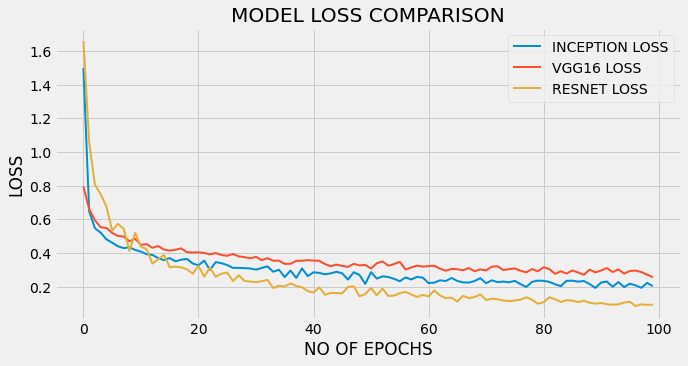

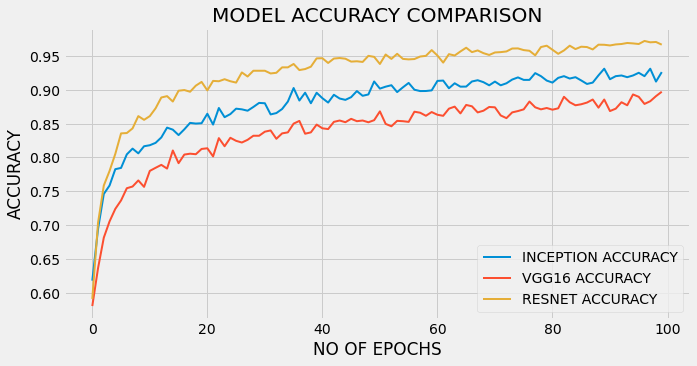

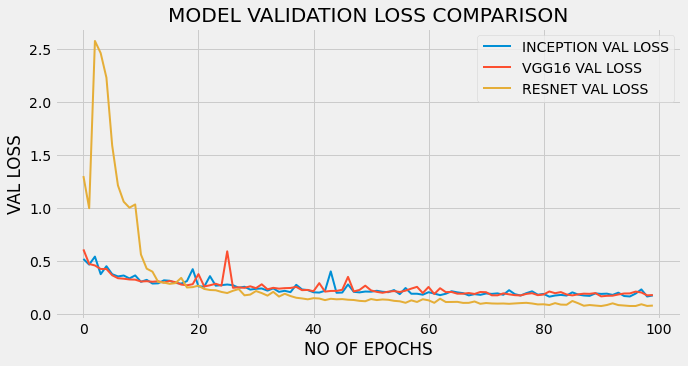

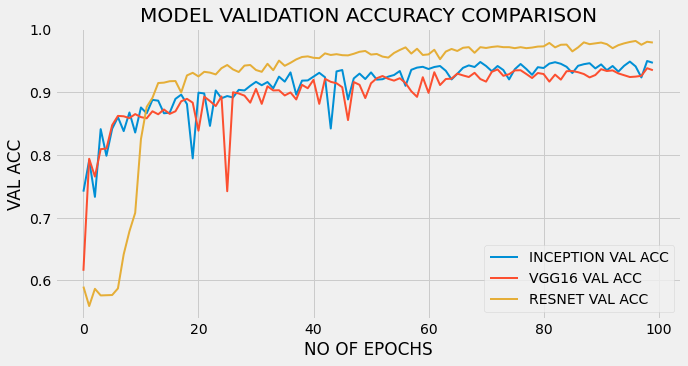

In [6]:
# MODEL COMPARISON 
# Plotting the graph by using python library matplotlib

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10,5)

inc = pd.read_csv('inception_history.csv').iloc[:,1:]
vgg = pd.read_csv('vgg16_history.csv').iloc[:,1:]
resnet = pd.read_csv('resnet_history.csv').iloc[:,1:]

plt.plot(inc['loss'], label = 'INCEPTION LOSS', linewidth = 2)
plt.plot(vgg['loss'], label = 'VGG16 LOSS', linewidth = 2)
plt.plot(resnet['loss'], label = 'RESNET LOSS', linewidth = 2)
plt.ylabel('LOSS')
plt.xlabel('NO OF EPOCHS')
plt.title('MODEL LOSS COMPARISON')
plt.legend()
plt.show()

plt.plot(inc['acc'], label = 'INCEPTION ACCURACY', linewidth = 2)
plt.plot(vgg['acc'], label = 'VGG16 ACCURACY', linewidth = 2)
plt.plot(resnet['acc'], label = 'RESNET ACCURACY', linewidth = 2)
plt.ylabel('ACCURACY')
plt.xlabel('NO OF EPOCHS')
plt.title('MODEL ACCURACY COMPARISON')
plt.legend()
plt.show()

plt.plot(inc['val_loss'], label = 'INCEPTION VAL LOSS', linewidth = 2)
plt.plot(vgg['val_loss'], label = 'VGG16 VAL LOSS', linewidth = 2)
plt.plot(resnet['val_loss'], label = 'RESNET VAL LOSS', linewidth = 2)
plt.ylabel('VAL LOSS')
plt.xlabel('NO OF EPOCHS')
plt.title('MODEL VALIDATION LOSS COMPARISON')
plt.legend()
plt.show()

plt.plot(inc['val_acc'], label = 'INCEPTION VAL ACC', linewidth = 2)
plt.plot(vgg['val_acc'], label = 'VGG16 VAL ACC', linewidth = 2)
plt.plot(resnet['val_acc'], label = 'RESNET VAL ACC', linewidth = 2)
plt.ylabel('VAL ACC')
plt.xlabel('NO OF EPOCHS')
plt.title('MODEL VALIDATION ACCURACY COMPARISON')
plt.legend()
plt.show()

In [6]:
# SINCE RESNET PERFORMS WELL AMONG THE OTHERS, WE ARE GOING TO USE IT FOR PREDICTION

from tensorflow.keras.models import load_model

model = load_model('resnet_model.h5')
X, y = validation_generator.next()
print(f'Predicted likelihood: {model.predict(X)[0][0]:.4f}')
print(f'Actual label: {int(y[0])}')
print(f'\nCorrect prediction: {round(model.predict(X)[0][0]) == y[0]}')

Predicted likelihood: 0.0026
Actual label: 0

Correct prediction: True


In [9]:
from tensorflow.keras.models import load_model

model = load_model('inception.h5')
X, y = validation_generator.next()
print(f'Predicted likelihood: {model.predict(X)[0][0]:.4f}')
print(f'Actual label: {int(y[0])}')
print(f'\nCorrect prediction: {round(model.predict(X)[0][0]) == y[0]}')

Predicted likelihood: 0.9987
Actual label: 1

Correct prediction: True


In [13]:
from tensorflow.keras.models import load_model

model = load_model('vgg16_model.h5')
X, y = validation_generator.next()
print(f'Predicted likelihood: {model.predict(X)[0][0]:.4f}')
print(f'Actual label: {int(y[0])}')
print(f'\nCorrect prediction: {round(model.predict(X)[0][0]) == y[0]}')

Predicted likelihood: 0.1031
Actual label: 0

Correct prediction: True


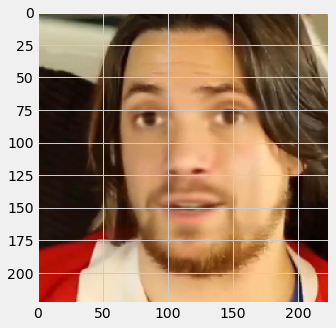

In [23]:
# Import the sample test image from the local directory using Keras preprocessing library function image.
# Display sample images using python library matplotlib. 

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
img = image.load_img('C:/Users/deepa/Documents/LYIT/DISSERTATION/df00342.jpg', target_size = (224,224))
#img = image.load_img('C:/Users/deepa/Documents/LYIT/DISSERTATION/real00143.jpg', target_size = (224,224))
#img = image.load_img('C:/Users/deepa/Documents/LYIT/DISSERTATION/000001.jpg', target_size = (224,224))
#img = image.load_img('C:/Users/deepa/Documents/LYIT/DISSERTATION/df00106.jpg', target_size = (224,224))

#img = image.load_img('C:/Users/deepa/Documents/LYIT/DISSERTATION/Art and Artificial Intelligence/AI1.jpg', target_size = (224,224))
#img = image.load_img('C:/Users/deepa/Pictures/PICS/DSC03355.JPG', target_size = (224,224))



# Converting a Python Image Library(PIL) Image to 3D Numpy Array
img = np.asarray(img)
plt.imshow(img)

# Adding the fourth dimension, for number of images
# Expanding the dimension by 1
img = np.expand_dims(img, axis = 0)



In [24]:
img.shape

(1, 224, 224, 3)

In [32]:
# Prediction of images by using Inception V3 model

from tensorflow.keras.models import load_model
model = load_model('inception.h5')
output = model.predict(img)
print(output[0][0])

if output[0][0] > 1:
    prediction = 'REAL'
    probability = output[0][0]
    print ("Predicted likelihood = " + str(probability))
    print("Prediction = " + prediction)
    
else:
        prediction = 'FAKE'
        probability = 1 - output[0][0]
        print ("Predicted likelihood = " + str(probability))
        print("Prediction = " + prediction)    


1.0
Predicted likelihood = 0.0
Prediction = FAKE


In [35]:
# Prediction of images by using VGG16 model

from tensorflow.keras.models import load_model
model = load_model('vgg16_model.h5')
output = model.predict(img)
print(output[0][0])

if output[0][0] > 1.0:
    prediction = 'REAL'
    probability = output[0][0]
    print ("probability = " + str(probability))
    print("Prediction = " + prediction)
    
else:
        prediction = 'FAKE'
        probability = 1 - output[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction) 

1.0
probability = 0.0
Prediction = FAKE


In [36]:
# Prediction of images by using RESNET 50 model

from tensorflow.keras.models import load_model
model = load_model('resnet_model.h5')
output = model.predict(img)
print(output[0][0])

if output[0][0] > 1:
    prediction = 'REAL'
    probability = output[0][0]
    print ("probability = " + str(probability))
    print("Prediction = " + prediction)
    
else:
        prediction = 'FAKE'
        probability = 1 - output[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction) 

1.0
probability = 0.0
Prediction = FAKE


1.0
probability = 1.0
Prediction = REAL


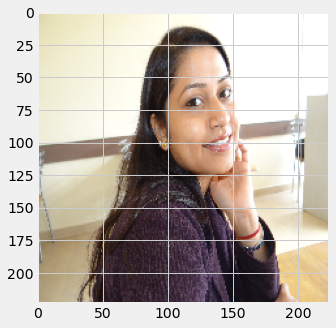

In [38]:
# Prediction of images by using RESNET 50 model
img = image.load_img('C:/Users/deepa/Pictures/PICS/DSC03355.JPG', target_size = (224,224))



# Converting a Python Image Library(PIL) Image to 3D Numpy Array
img = np.asarray(img)
plt.imshow(img)

# Adding the fourth dimension, for number of images
# Expanding the dimension by 1
img = np.expand_dims(img, axis = 0)


from tensorflow.keras.models import load_model
model = load_model('resnet_model.h5')
output = model.predict(img)
print(output[0][0])

if output[0][0] >= 1:
    prediction = 'REAL'
    probability = output[0][0]
    print ("probability = " + str(probability))
    print("Prediction = " + prediction)
    
else:
        prediction = 'FAKE'
        probability = 1 - output[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)